notebook with general ideas for creating unites states data

In [9]:
data_us_p = pd.read_csv("nst-est2019-alldata.csv")

In [10]:
data_us_vacc= pd.read_csv("us_state_vaccinations.csv")

In [57]:
distance_df = pd.read_csv("distance-matrix.csv")

In [11]:
data_us_vacc.date = pd.to_datetime(data_us_vacc.date, format='%Y-%m-%d')

In [12]:
data_us_vacc = data_us_vacc.rename(columns={'location': 'RegionName'})

In [17]:
us_data_ox = data_ox[data_ox.iso_code == 'USA']
us_data_ox = us_data_ox[us_data_ox['RegionName'].notna()]

In [18]:
data_us_pop = data_us_p.rename(columns = {'NAME':'RegionName', 'POPESTIMATE2019':'population'})[['RegionName','population']]

In [19]:
us_data_ox.shape, data_us_vacc.shape

((22389, 49), (4183, 14))

In [20]:
us_data_state = pd.merge(us_data_ox, data_us_vacc, how='left', on =['RegionName', 'date'])

In [22]:
us_data_state = pd.merge(us_data_state, data_us_pop, how='left', on =['RegionName'])

In [23]:
def state_dict_to_df(state_data, n_rows):
    df = pd.DataFrame(columns=list(state_data.keys()))
    for column, values in state_data.items():
        if isinstance(values, pd.Series):
            df[column] = values.tolist()
        else:
            df[column] = [values] * n_rows
    return df

In [47]:
data_ox_n = data_ox[data_ox.RegionName.isna()]

In [25]:
data_owid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [26]:
data_ox.columns

Index(['CountryName', 'iso_code', 'RegionName', 'RegionCode', 'Jurisdiction',
       'date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing',
       'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'M1_Wildcard', 'total_cases', 'total_deaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'Gove

In [28]:
us_data_state

CountryName iso_code RegionName RegionCode Jurisdiction       date  \
0      United States      USA     Alaska      US_AK  STATE_TOTAL 2020-01-01   
1      United States      USA     Alaska      US_AK  STATE_TOTAL 2020-01-02   
2      United States      USA     Alaska      US_AK  STATE_TOTAL 2020-01-03   
3      United States      USA     Alaska      US_AK  STATE_TOTAL 2020-01-04   
4      United States      USA     Alaska      US_AK  STATE_TOTAL 2020-01-05   
...              ...      ...        ...        ...          ...        ...   
22384  United States      USA    Wyoming      US_WY  STATE_TOTAL 2021-03-10   
22385  United States      USA    Wyoming      US_WY  STATE_TOTAL 2021-03-11   
22386  United States      USA    Wyoming      US_WY  STATE_TOTAL 2021-03-12   
22387  United States      USA    Wyoming      US_WY  STATE_TOTAL 2021-03-13   
22388  United States      USA    Wyoming      US_WY  STATE_TOTAL 2021-03-14   

       C1_School closing  C1_Flag  C2_Workplace closing  C2_Flag  ...  \
0                    0.0      NaN                   0.0      NaN  ...   
1                    0.0      NaN                   0.0      NaN  ...   
2                    0.0      NaN                   0.0      NaN  ...   
3                    0.0      NaN                   0.0      NaN  ...   
4                    0.0      NaN                   0.0      NaN  ...   
...                  ...      ...                   ...      ...  ...   
22384                NaN      NaN                   NaN      NaN  ...   
22385                NaN      NaN                   NaN      NaN  ...   
22386                NaN      NaN                   NaN      NaN  ...   
22387                NaN      NaN                   NaN      NaN  ...   
22388                NaN      NaN                   NaN      NaN  ...   

       people_fully_vaccinated_per_hundred  total_vaccinations_per_hundred  \
0                                      NaN                             NaN   
1                                      NaN                             NaN   
2                                      NaN                             NaN   
3                                      NaN                             NaN   
4                                      NaN                             NaN   
...                                    ...                             ...   
22384                                12.25                           32.86   
22385                                12.30                           32.93   
22386                                12.97                           34.42   
22387                                13.48                           35.61   
22388                                13.92                           36.61   

       people_fully_vaccinated  people_vaccinated_per_hundred  \
0                          NaN                            NaN   
1                          NaN                            NaN   
2                          NaN                            NaN   
3                          NaN                            NaN   
4                          NaN                            NaN   
...                        ...                            ...   
22384                  70919.0                          20.18   
22385                  71215.0                          20.21   
22386                  75057.0                          21.04   
22387                  78002.0                          21.75   
22388                  80582.0                          22.32   

       distributed_per_hundred  daily_vaccinations_raw  daily_vaccinations  \
0                          NaN                     NaN                 NaN   
1                          NaN                     NaN                 NaN   
2                          NaN                     NaN                 NaN   
3                          NaN                     NaN                 NaN   
4                          NaN                     NaN                 NaN 

In [30]:
actions = ['C1_School closing',       
           'C2_Workplace closing',
           'C3_Cancel public events', 
           'C4_Restrictions on gatherings', 
           'C5_Close public transport',
           'C6_Stay at home requirements',
           'C7_Restrictions on internal movement',
           'C8_International travel controls', 
           'E1_Income support', 
           'E2_Debt/contract relief', 
           'E3_Fiscal measures',
           'E4_International support', 
           'H1_Public information campaigns',
           'H2_Testing policy', 
           'H3_Contact tracing',
           'H4_Emergency investment in healthcare', 
           'H5_Investment in vaccines',
           'H6_Facial Coverings', 
           'H7_Vaccination policy', 
           'M1_Wildcard']

In [48]:
data_all = pd.merge(data_owid, data_ox_n, how='inner', left_on=['iso_code', 'date', 'total_cases', 'total_deaths'], right_on = ['iso_code', 'date', 'total_cases', 'total_deaths'])

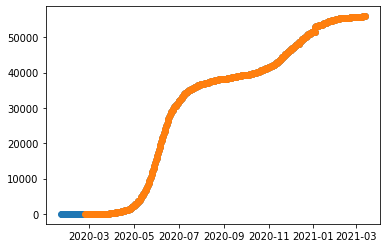

In [49]:
plt.scatter(data_ox[data_ox.iso_code == 'AFG'].date, data_ox[data_ox.iso_code == 'AFG'][['total_cases']])
plt.scatter(data_owid[data_owid.iso_code == 'AFG'].date, data_owid[data_owid.iso_code == 'AFG'][['total_cases']])

In [53]:
data_all = pd.merge(data_ox_n, data_owid, how='inner', left_on=['iso_code', 'date'], right_on = ['iso_code', 'date'])